Here the MNSIT problem has been solved using a 2 layer neural network with relu as activation function after each layer.Adam Optimiser has been used to optimise the cost and update the weights of the hidden layer

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [35]:
images = pd.read_csv('train.csv')

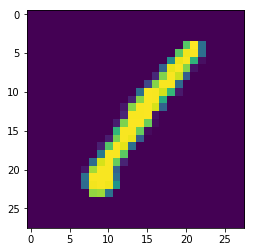

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(images.iloc[0][1:].values.reshape([28,28]))

In [37]:
X = images[images.columns[1:]].as_matrix()
Y = np.zeros([len(images),10])
for i in range(len(images)):
  Y[i][images.iloc[i]['label']] = 1


In [38]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state = 42)
y_train.shape

(28140, 10)

In [39]:
X_test.shape

(13860, 784)

In [40]:
samples = images.count()
batch_size = 100

epoch = 1
learning_rate = .0005

input_size = len(images.columns)-1
hiddenLayer1_size = 256
hiddenLayer2_size = 256
output_size = 10

In [41]:
x = tf.placeholder(tf.float32, shape=[None, input_size])
y = tf.placeholder(tf.float32, shape=[None, output_size])

weights = {
   'h1': tf.Variable(tf.random_normal([input_size, hiddenLayer1_size])),
   'h2': tf.Variable(tf.random_normal([hiddenLayer1_size, hiddenLayer2_size])),
   'out': tf.Variable(tf.random_normal([hiddenLayer2_size, output_size]))
}
biases = {
   'h1': tf.Variable(tf.random_normal([hiddenLayer1_size])),
   'h2': tf.Variable(tf.random_normal([hiddenLayer2_size])),
   'out': tf.Variable(tf.random_normal([output_size]))
}

In [42]:
def createDeepNetwork(x,weights, biases):
   l1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
   l2 = tf.nn.relu(tf.add(tf.matmul(l1, weights['h2']), biases['h2']))
   outlayer = tf.add(tf.matmul(l2, weights['out']), biases['out'])
   return outlayer
predictions = createDeepNetwork(x,weights,biases)

In [43]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=predictions,labels=y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [44]:
init = tf.global_variables_initializer()
session = tf.InteractiveSession()
session.run(init)

In [45]:
len(X)

42000

In [46]:
batch_size = 100
for i in range(100):
    total_batch = int(len(X_train)/batch_size)
    avg_cost = 0.0
    for bid in range(total_batch):
        batch_x = X_train[bid*batch_size:(bid+1)*batch_size]
        batch_y = y_train[bid*batch_size:(bid+1)*batch_size]
        _,ct = session.run([optimiser,cost],feed_dict={x:batch_x,y:batch_y})
        #print("Cost . " , ct)
       
        avg_cost += ct / total_batch
        #print("avg cost ", avg_cost)
    print("average cost for the round " , avg_cost)


('average cost for the round ', 25826.851329654142)
('average cost for the round ', 5862.9169383201697)
('average cost for the round ', 3778.1513224428681)
('average cost for the round ', 2861.9841304249617)
('average cost for the round ', 2319.269141797919)
('average cost for the round ', 1941.5474655857286)
('average cost for the round ', 1659.7849178653589)
('average cost for the round ', 1440.097424490172)
('average cost for the round ', 1258.3922961903638)
('average cost for the round ', 1105.5751894479124)
('average cost for the round ', 973.86024437086473)
('average cost for the round ', 861.57439544786394)
('average cost for the round ', 764.20338738600981)
('average cost for the round ', 680.2673374053843)
('average cost for the round ', 607.63373014511205)
('average cost for the round ', 543.73935590859401)
('average cost for the round ', 485.51780306995977)
('average cost for the round ', 431.93242953426062)
('average cost for the round ', 384.99681704918271)
('average cost 

In [48]:
correct_prediction = tf.equal(tf.arg_max(predictions,1),tf.arg_max(y,1))

In [49]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [50]:
print(session.run(accuracy, feed_dict={x:X_test, y:y_test}))

0.942569


In [51]:
test_data = pd.read_csv("test.csv")
Xtest = test_data.as_matrix()

In [52]:
test_pred = session.run(predictions,feed_dict={x:Xtest})

In [53]:
outValue = session.run(tf.arg_max(test_pred,1))

In [54]:
outValue

array([2, 0, 5, ..., 3, 9, 2])

In [55]:
output = pd.DataFrame(outValue, columns=["Label"],index=range(1,28001))
output.index.names = ['ImageId']
output.to_csv('output.csv')